## In the second phase, I am going to merge my gathered dataset with a publicly available dataset that was mentioned earlier. The dataset has 111 features, and I will only use features extracted from URLs. All the features are the same regarding their functionality. In both datasets, URLs were examined and the same information acquired from both of them.

In [1]:
# Regular EDA and plotting libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# For plots to appear in the notebook
%matplotlib inline

# Prep-processing
from sklearn.preprocessing import StandardScaler

# Model implementation
from sklearn.model_selection import train_test_split

# Model
from sklearn.ensemble import RandomForestClassifier

# Models evaluation
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, accuracy_score, f1_score

pd.set_option("display.max_columns", None)


In [2]:
public_dataset = pd.read_csv('dataset_full.csv')

In [3]:
public_dataset

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,phishing,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,17,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.207316,0,60781,-1,-1,1,2,0,892,0,0,0,0,0
1,5,0,1,3,0,3,0,2,0,0,0,0,0,0,0,0,0,3,223,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,16,0,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,1,0,0,3,0,2,0,0,0,0,0,0,0,0,0,165,0,3,0,0.499566,-1,36024,579,150,1,2,1,9540,1,0,0,0,0
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.935901,0,4766,-1,-1,1,2,3,589,1,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,81,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,19,0,0,2,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410021,0,20454,-1,-1,1,2,0,292,1,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,19,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410761,0,53831,6998,306,1,2,1,3597,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,23,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,23,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.135186,0,8560,5509,334,1,3,1,3597,

In [4]:
# Knowing the shape of the dataset
public_dataset.shape

(88647, 112)

In [5]:
# information regarding the dataset
public_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to url_shortened
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


In [6]:
# Knowing the data type of each and every column (feature)
public_dataset.dtypes

qty_dot_url             int64
qty_hyphen_url          int64
qty_underline_url       int64
qty_slash_url           int64
qty_questionmark_url    int64
                        ...  
tls_ssl_certificate     int64
qty_redirects           int64
url_google_index        int64
domain_google_index     int64
url_shortened           int64
Length: 112, dtype: object

## All of the data types in the dataset is int64. So, there will not be any coding for example to convert string types into integers and vice versa.

# Data Cleaning on the public dataset

## Firstly, I am going to examine the dataset to see whether it has any null values or not. Further, based on the article mentioned earlier by the creators of the dataset, I will extract the rest of the features and only will focus on URL-related features.

In [7]:
public_dataset.isnull().values.any()

False

## The output False indicates there is no null value at all in the dataset.

In [8]:
public_dataset.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
tls_ssl_certificate     0
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
Length: 112, dtype: int64

In [9]:
public_dataset.isnull().sum().sum()

0

## No missing values

------------------------------

## Extracting URL-related features

### Based on the aforementioned paper, first 20 features are URL-related ones, and I am going to slice the dataset and create a new one containing only those features along with the phishing column

In [10]:
url_contained_df = public_dataset.iloc[:, 0:20]
url_contained_df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,phishing
0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,1
1,5,0,1,3,0,3,0,2,0,0,0,0,0,0,0,0,0,3,223,1
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,0
3,4,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,81,1
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,23,0
88643,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,34,0
88644,2,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,70,1
88645,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,1


In [11]:
url_contained_df.shape

(88647, 20)

# EDA

CORRELATION MATRIX


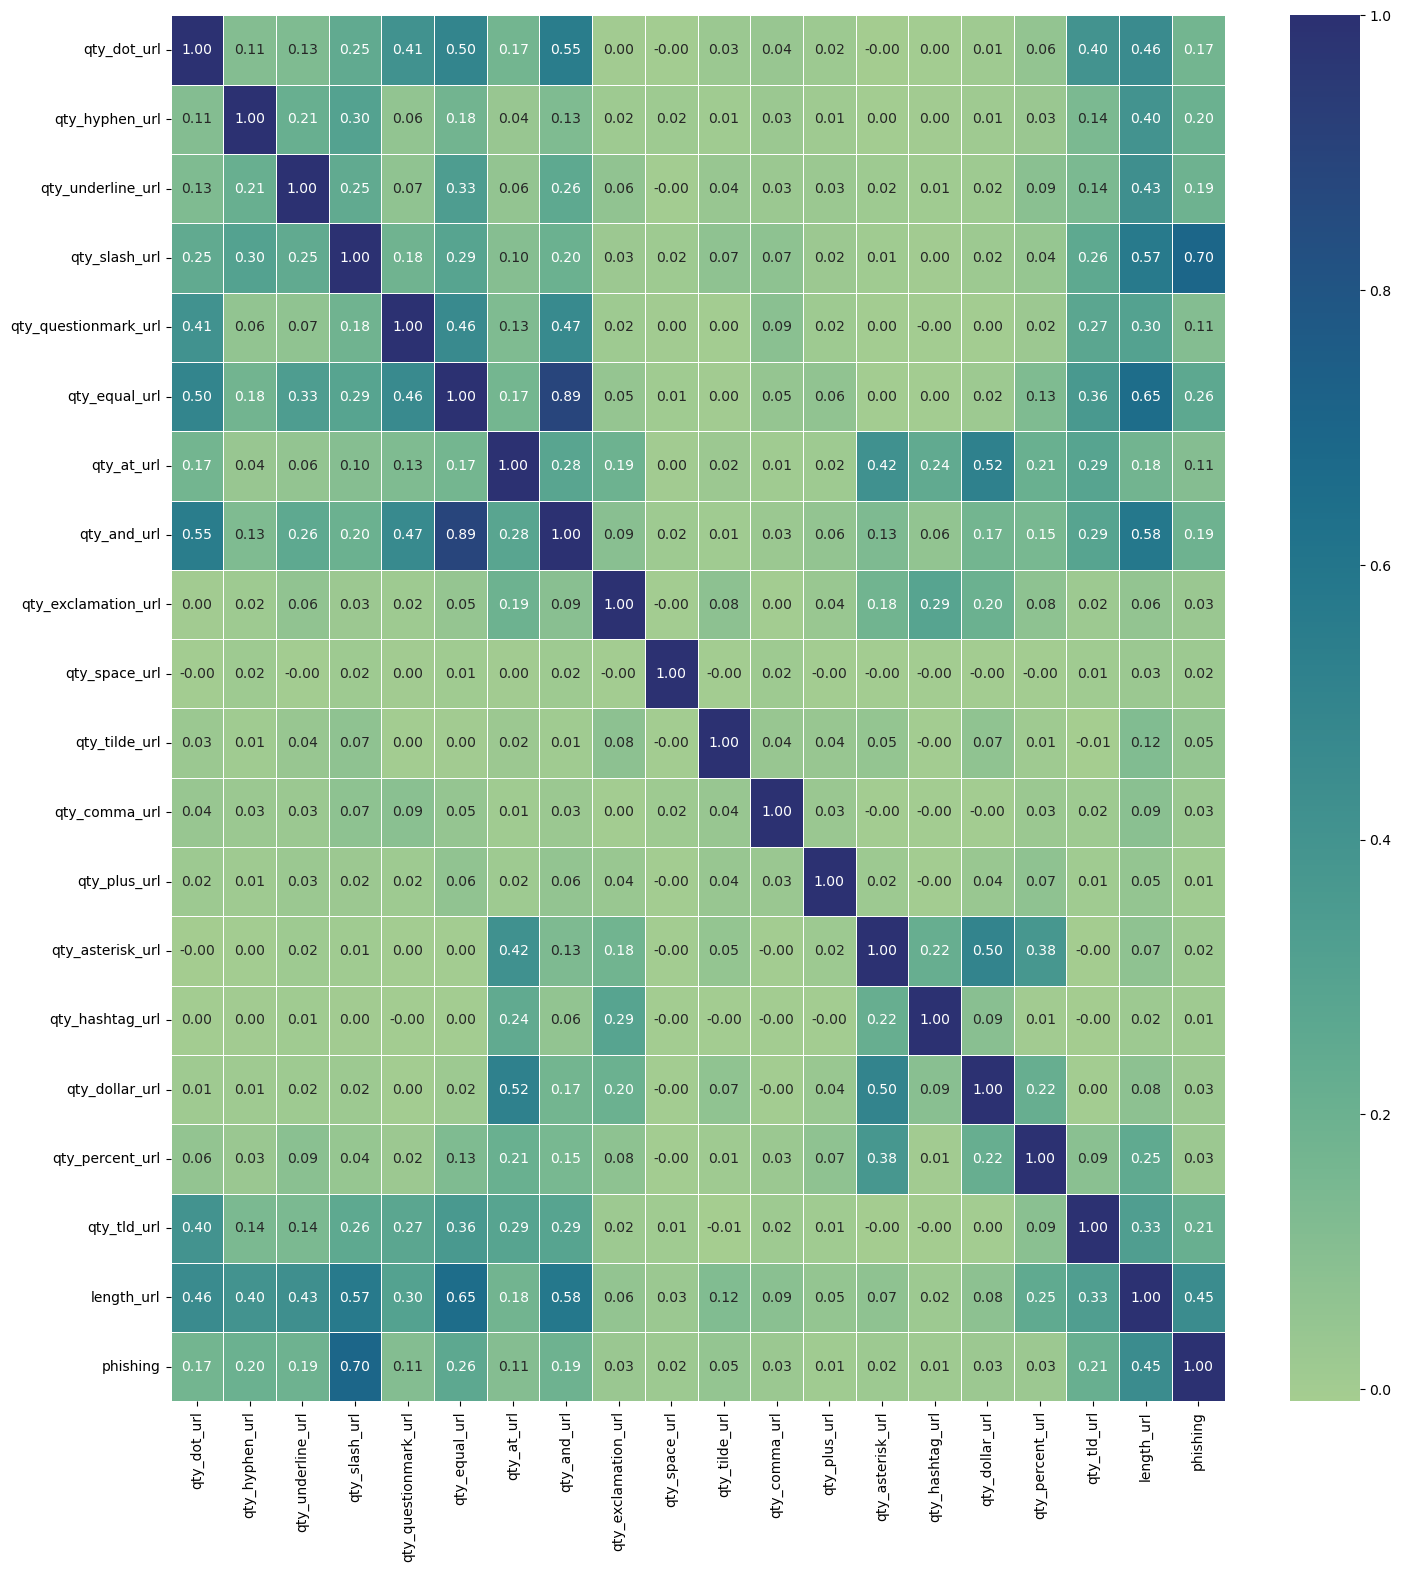

In [12]:
# Increasing the size of the plot
plt.figure(figsize=(17, 18))

sns.heatmap(url_contained_df.corr(), annot=True, fmt=".2f", linewidth=.4, cmap="crest")
print('CORRELATION MATRIX')
plt.show()

### As can be seen from the plot, there are some highly positive correlations between the phishing feature and other features, which are somehow different yet the same with my gathered dataset.

## As taking phishing as my dependent variable, this matrix shows that the maximum correlation coefficient of around 0.70 with the qty_slash_url, which is not a strong correlation though. As we know, the higher positive value, the better. In the dataset, several variables have low positive correlation with the target feature. However, it is good not to see any negative correlations. Based on our domain knowledge in the field of phishing, it is aligned with my preliminary thought, which was about url effects. URLs in general have one of the most influential effects on detecting phishing websites

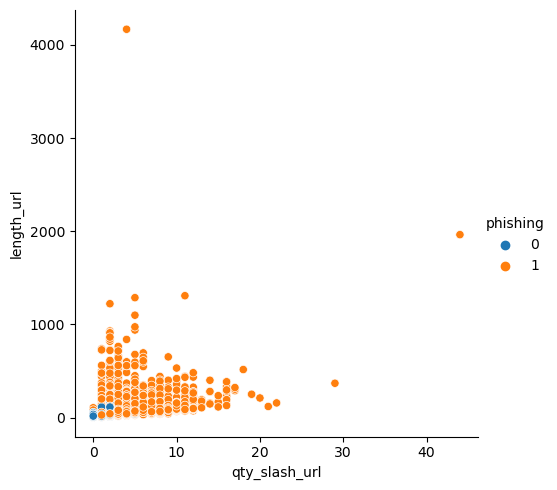

In [13]:
sns.relplot(data=url_contained_df, x="qty_slash_url", y="length_url", hue="phishing")

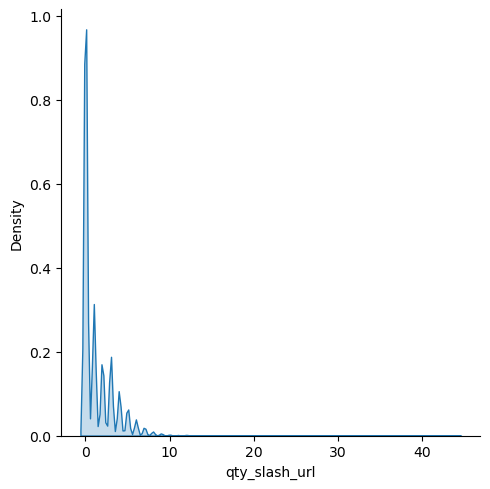

In [14]:
sns.displot(data=url_contained_df, x='qty_slash_url', kind='kde', fill=True)

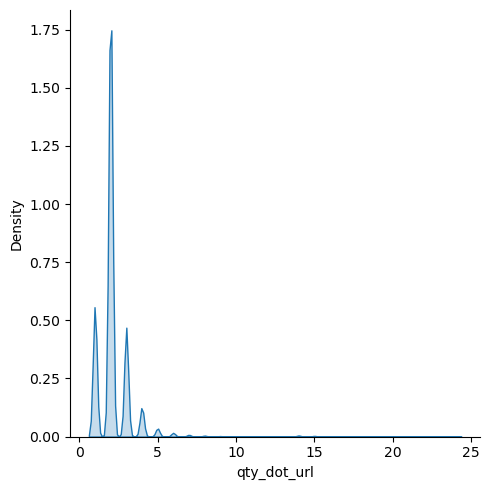

In [15]:
sns.displot(data=url_contained_df, x='qty_dot_url', kind='kde', fill=True)

## The below plot gives us a sense about the distribution of phishing and legitimate websites

Text(-12.805555555555555, 0.5, 'No. of values')

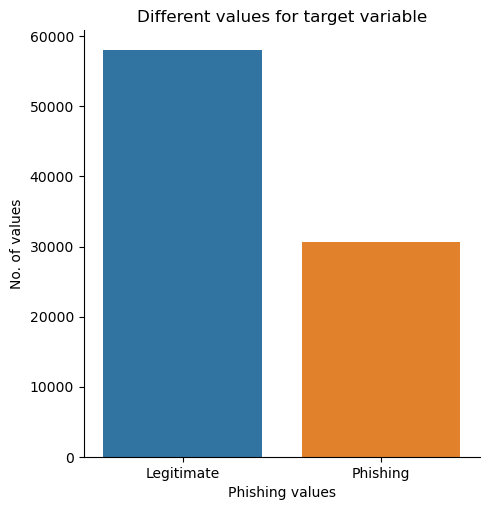

In [16]:
sns.catplot(data=url_contained_df, x='phishing', kind='count')
plt.title("Different values for target variable")
LABELS = ['Legitimate', 'Phishing']
plt.xticks(range(2), LABELS)
plt.xlabel("Phishing values")
plt.ylabel("No. of values")

## As can be noticed, there are way more legitimate instances than phishing ones, and it does make sense because in the real world there are less phishing websites existed, and my project is gathered real data. Based on my search, I can make the dataset a balanced one with different techniques, and I plan to elaborate on my project in detail, and put it on Github.

## I also changes my gathered dataset's headings to be the same as the public dataset. It is because of ease of use when I merge them

## Merging the datasets

In [17]:
# Importing my gathered dataset
gathered_dataset = pd.read_csv('clean_gathered_dataset.csv')
gathered_dataset

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,phishing
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27734,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,1
27735,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,1
27736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1
27737,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,1


## Merging them with concat function

In [18]:
frames = [url_contained_df, gathered_dataset]
df = pd.concat(frames)

In [19]:
# Successfully merged!
df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,phishing
0,3,0,0,1,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,25,1
1,5,0,1,3,0,3,0,2,0,0,0.0,0,0,0,0,0,0,3,223,1
2,2,0,0,1,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,15,0
3,4,0,2,5,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,81,1
4,2,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27734,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,7,1
27735,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,8,1
27736,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,13,1
27737,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,11,1


# Data Cleaning on the merged dataset

### qty_tilde has some missing values, and therefore, I decided to fill all of them with the mode number as the number of samples are sufficient enough, and it does not make noisy data. This is because my gathered dataset did not have this kind of feature in itself.

In [20]:
df.isnull().sum()

qty_dot_url                 0
qty_hyphen_url              0
qty_underline_url           0
qty_slash_url               0
qty_questionmark_url        0
qty_equal_url               0
qty_at_url                  0
qty_and_url                 0
qty_exclamation_url         0
qty_space_url               0
qty_tilde_url           27739
qty_comma_url               0
qty_plus_url                0
qty_asterisk_url            0
qty_hashtag_url             0
qty_dollar_url              0
qty_percent_url             0
qty_tld_url                 0
length_url                  0
phishing                    0
dtype: int64

In [23]:
# Different values for qty_tilde_url
df['qty_tilde_url'].value_counts()

0.0    88430
1.0      187
3.0       17
5.0        6
2.0        5
4.0        2
Name: qty_tilde_url, dtype: int64

In [22]:
df['qty_tilde_url'].mode()

0    0.0
Name: qty_tilde_url, dtype: float64

### As the mode of it is 0, I fill missing values with 0

In [27]:
df['qty_tilde_url'] = df['qty_tilde_url'].fillna(0)

In [28]:
df.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
qty_equal_url           0
qty_at_url              0
qty_and_url             0
qty_exclamation_url     0
qty_space_url           0
qty_tilde_url           0
qty_comma_url           0
qty_plus_url            0
qty_asterisk_url        0
qty_hashtag_url         0
qty_dollar_url          0
qty_percent_url         0
qty_tld_url             0
length_url              0
phishing                0
dtype: int64

# Model Training

### Rules and explanations are exactly the same as the first phase except that I changed the portion of testing batch to 15% as the number of samples increased

In [29]:
X = df.drop(['phishing'], axis=1)
y = df['phishing']

In [30]:
print(X.shape)
print(y.shape)

(116386, 19)
(116386,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(98928, 19)
(17458, 19)
(98928,)
(17458,)


In [33]:
# Scaling the training and testing sets
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

## Random Forest Development

In [34]:
clf = RandomForestClassifier()
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
print("Accuracy is", accuracy_score(y_test, y_pred))

Accuracy is 0.8805132317562149


### I got an accuracy of around 0.8805 this time which means that my model is capable of detecting phishing websites for around 88% or simply 88 cases out of 100. This is quite a decent accuracy but there is room for improvement. In comparison with the first phase, my model is improved by 9%, which shows that my approach in merging the datasets is helpful.

Text(0.5, 1.0, 'Random Forest Confusion Matrix')

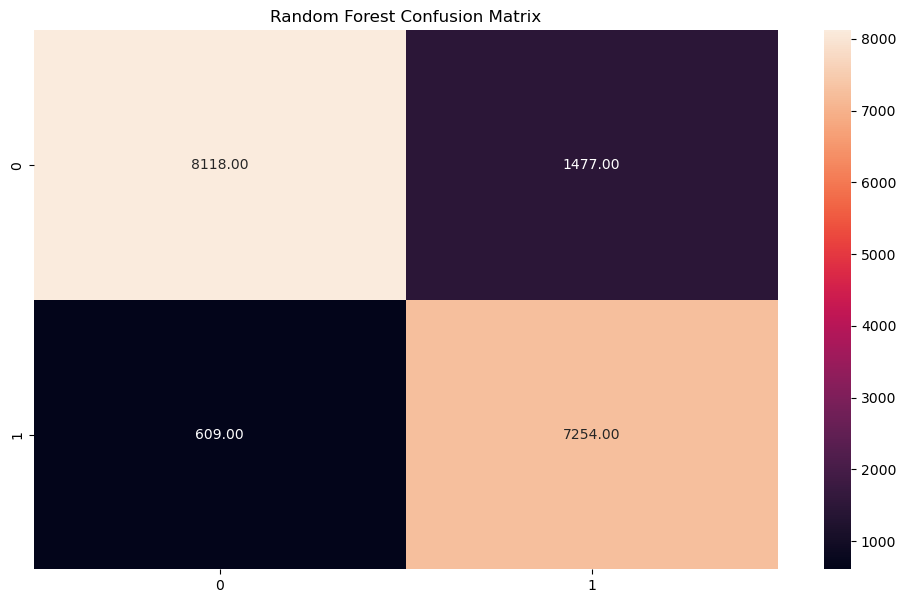

In [35]:
plt.figure(figsize=(12, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="0.2f")
plt.title("Random Forest Confusion Matrix")

## As can be seen from the plot, the number of errors also decreased to a good level. False negatives and False Positives are now much fewer than the previous phase.

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      9595
           1       0.83      0.92      0.87      7863

    accuracy                           0.88     17458
   macro avg       0.88      0.88      0.88     17458
weighted avg       0.89      0.88      0.88     17458



## The classification report also shows prominent results! Recall, precision, and f1-score all increased to a very good level. My approach worked!!!

# Future Improvement

## Regarding improvement of this project, I aim to increase metrics, and decrease errors even more. In spite of this, I was unable to accomplish these tasks due to the large size of the data and the time constraints. Moreover, my model is limited by the imbalanced data, which may have affected its performance. A technique such as oversampling or undersampling could be used in the future to address this issue.

# Many thanks <3

# Sepideh Khorrami

In [37]:
!pip install nbconvert[webpdf]

     -------------------------------------- 83.4/83.4 kB 391.1 kB/s eta 0:00:00
     -------------------------------------- 101.4/101.4 kB 1.4 MB/s eta 0:00:00


In [ ]:
!jupyter nbconvert --to webpdf --allow-chromium-download merged.ipynb